<a href="https://colab.research.google.com/github/kanhaz-spec/MACHINE-LEARNING/blob/main/_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
file_path ='/content/drive/MyDrive/Machine Learning/data_banknote_authentication.csv'


In [6]:
df=pd.read_csv(file_path)


In [7]:
print(df.head())


    3.6216  8.6661  -2.8073  -0.44699  0
0  4.54590  8.1674  -2.4586  -1.46210  0
1  3.86600 -2.6383   1.9242   0.10645  0
2  3.45660  9.5228  -4.0112  -3.59440  0
3  0.32924 -4.4552   4.5718  -0.98880  0
4  4.36840  9.6718  -3.9606  -3.16250  0


In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.2, random_state=42
      )


In [10]:
mlp = MLPClassifier(hidden_layer_sizes=(10,10),
                    activation='relu',
                    solver='adam',
                    max_iter=500,
                    early_stopping=True,
                    validation_fraction=0.1,
                    random_state=42)


In [11]:
history = mlp.fit(X_train, y_train)


In [12]:
y_pred = mlp.predict(X_test)


In [13]:
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

Confusion Matrix:
 [[147   1]
 [  5 122]]
Accuracy: 0.9781818181818182
Precision: 0.991869918699187
Recall: 0.9606299212598425
F1 Score: 0.976


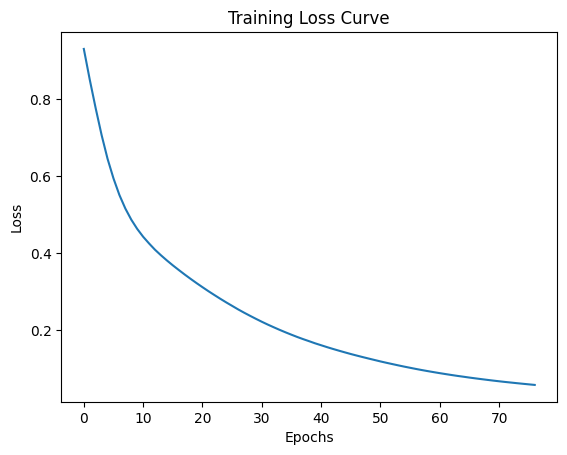

In [14]:
plt.plot(mlp.loss_curve_)
plt.title("Training Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [16]:
for act in ['tanh', 'logistic', 'identity']:
      mlp_alt = MLPClassifier(hidden_layer_sizes=(10,10),
                                  activation=act,
                                  solver='adam',
                                  max_iter=500,
                                  early_stopping=True,
                                  validation_fraction=0.1,
                                  random_state=42)
      mlp_alt.fit(X_train, y_train)
      y_pred_alt = mlp_alt.predict(X_test)
      print(f"\nActivation: {act}")
      print("Accuracy:", accuracy_score(y_test, y_pred_alt))


Activation: tanh
Accuracy: 0.9672727272727273

Activation: logistic
Accuracy: 0.5381818181818182

Activation: identity
Accuracy: 0.9636363636363636
